# Olist E-Commerce Analytics Project

## Objective
This project analyzes Brazil’s Olist e-commerce platform to:
1. Understand historical order demand
2. Forecast future monthly orders
3. Segment customers based on purchasing behavior
4. Generate actionable insights for business decision-making

## Business Use Case
The analysis is designed to support:
- Inventory and logistics planning
- Customer retention strategies
- Marketing segmentation


In [42]:
#Initialization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error

from prophet import Prophet


In [43]:
 #Loading the dataset
df = pd.read_csv('olist_orders_dataset.csv')

#Converting the time values
df['ds'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M').dt.to_timestamp()
data = df.groupby('ds').size().reset_index(name='y')

#Filtering the range
# Note: Since 'ds' is now a Timestamp object, we compare it to a Timestamp
data = data[(data['ds'] >= pd.Timestamp('2017-01-01')) & (data['ds'] <= pd.Timestamp('2018-08-01'))]

#Split data
train = data.iloc[:-3] 
test = data.iloc[-3:]  

#Train data
model = Prophet(seasonality_mode='multiplicative')
model.fit(train)

#Forecast
future = model.make_future_dataframe(periods=3, freq='MS')
forecast = model.predict(future)

#Accuracy
y_pred = forecast['yhat'].iloc[-3:].values
y_true = test['y'].values

# Final
wmape = (np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)) * 100

print(f"Actual Dates: {test['ds'].dt.date.values}")
print(f"Forecast Dates: {forecast['ds'].iloc[-3:].dt.date.values}")
print(f"Final Monthly wMAPE: {wmape:.2f}%")

15:50:23 - cmdstanpy - INFO - Chain [1] start processing
15:50:23 - cmdstanpy - INFO - Chain [1] done processing


Actual Dates: [datetime.date(2018, 6, 1) datetime.date(2018, 7, 1)
 datetime.date(2018, 8, 1)]
Forecast Dates: [datetime.date(2018, 6, 1) datetime.date(2018, 7, 1)
 datetime.date(2018, 8, 1)]
Final Monthly wMAPE: 37.39%


In [44]:
 #Loading files
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

#Joining tables together
# First, link orders to the items (to get the price)
master_df = pd.merge(orders, items, on='order_id', how='inner')

#Linking table to the customers (to get unique customer IDs)
master_df = pd.merge(master_df, customers, on='customer_id', how='inner')

#Converting timestamps to actual datetime objects
master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'])

print(f"Total Rows: {master_df.shape[0]}")
master_df.head()

Total Rows: 112650


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [45]:
# Calculating Monetary and Frequency
rfm = master_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

# Renamingcolumns
rfm.columns = ['customer_id', 'MaxDate', 'Frequency', 'Monetary']

# Calculating Recency
snapshot_date = rfm['MaxDate'].max() + dt.timedelta(days=1)
rfm['Recency'] = rfm['MaxDate'].apply(lambda x: (snapshot_date - x).days)

# Preparing data for KMeans 
features = ['Recency', 'Frequency', 'Monetary']
X = rfm[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Running KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

print("Segmentation Complete!")
print(rfm.groupby('Cluster')[features].mean())

Segmentation Complete!
            Recency  Frequency     Monetary
Cluster                                    
0        133.518810   1.000000   113.596573
1        393.691438   1.000000   114.481193
2        226.184530   2.114811   243.049823
3        244.351518   1.014078  1145.314571


Cluster 0 ("Recent One-Timers"): They bought recently (133 days ago) but only once and spent a moderate amount ($113). Strategy: Send them a "Welcome Back" discount to get their second purchase.

Cluster 1 ("Hibernating"): They haven't bought in a long time (393 days). Strategy: These are likely churned; they need a high-value offer to return.

Cluster 2 ("Loyalists"): These are your best customers for frequency. They buy twice as often (2.11 orders) and spend more. Strategy: Loyalty program or early access to new products.

Cluster 3 ("Big Spenders"): They don't buy often, but when they do, they spend a lot ($1,145 average!). Strategy: VIP treatment and high-end product recommendations.

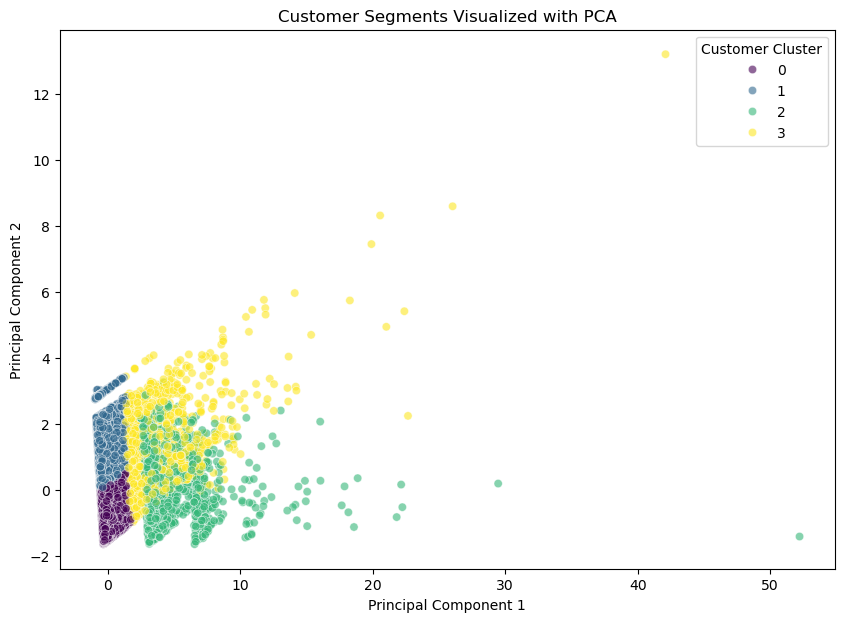

In [46]:
#Reducing dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_scaled)
rfm['pca_1'] = pca_results[:, 0]
rfm['pca_2'] = pca_results[:, 1]

#Creating Scatter Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_1', y='pca_2', hue='Cluster', data=rfm, palette='viridis', alpha=0.6)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Customer Cluster')
plt.show()

In [47]:
#Loading the Geolocation and Sellers data
geo = pd.read_csv('olist_geolocation_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

#Using master_df from Step 2
logistics_df = pd.merge(master_df, sellers, on='seller_id', how='inner')

#Calculating Freight Efficiency (Freight cost as % of product price)
logistics_df['freight_ratio'] = logistics_df['freight_value'] / logistics_df['price']

#Identifying the most expensive states to ship to
shipping_analysis = logistics_df.groupby('customer_state').agg({
    'freight_value': 'mean',
    'freight_ratio': 'mean',
    'order_id': 'count'
}).sort_values(by='freight_value', ascending=False)

print("Shipping Cost Analysis by State (Top 5 Most Expensive):")
print(shipping_analysis.head())

Shipping Cost Analysis by State (Top 5 Most Expensive):
                freight_value  freight_ratio  order_id
customer_state                                        
RR                  42.984423       0.589050        52
PB                  42.723804       0.511597       602
RO                  41.069712       0.594188       278
AC                  40.073370       0.511651        92
PI                  39.147970       0.499842       542


In [48]:
#Saving the Forecasting results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('sales_forecast.csv', index=False)

#Saving the Customer Segments
rfm.to_csv('customer_segments.csv', index=False)

#Saving the Logistics Analysis
shipping_analysis.to_csv('shipping_optimization.csv')

## Key Insights and Recommendations

1. Monthly order demand shows consistent growth, suggesting scaling opportunities.
2. A small segment of customers contributes disproportionately to revenue.
3. Retention strategies targeting high-value customers can improve profitability.
4. Demand forecasts can support proactive inventory and logistics planning.

## Limitations
- Forecast accuracy is limited by historical data length
- Clustering does not capture qualitative customer behavior

## Next Steps
- Incorporate product categories
- Use churn prediction models
